# Computation of the Lattice of Integral Differential Forms
In this Jupyter-Notebook we show how to use our implementation to compute the lattice of integral differential forms for superelliptic curves. The first part is dedicated to the examples in [KunzweilerWewers20]. In the second part, we look at some more general situations. And finally, we explain an application to the computation of the *hyperelliptic discriminant*.

In [2]:
load('superelliptic_curves.py')
import sys
sys.path.append('/home/user')

## Examples from the manuscript

Let us first look at **Example 5.2** from [KunzweilerWewers20].

We consider the hyperelliptic curve
$$ Y: y^2 = (x^2-5)^3-5^5$$
defined over $\QQ_5$.

The input for our algorithm in this case is:
* the polynomial $f = (x^2-5)^3-5^5$,
* the exponent $n=2$ of $y$,
* the $5$-adic valuation $v_5$.

The output is:
* the basis [x,5]. In this implementation the space of differentials is viewed as a subspace of the function space of $Y$ via the embedding $\omega \mapsto \omega / \eta$ with $\eta = \frac{dx}{y^{n-1}}$. This means that $$(x\frac{dx}{y}, 5 \frac{dx}{y})$$ is a basis for the lattice of integral differentials of $Y$.

In [3]:
R.<x> = QQ[]
f = (x^2-5)^3-5^5
n=2
v5 = QQ.valuation(5)
M = integral_differentials(f,n,v5); M

the lattice with basis [x, 5]

Modifying the above computation by setting $n=3$, we compute the lattice of integral differential forms for the superelliptic curve 
$$y^3 = (x^2-5)^3-5^5.$$
This is **Example 5.3** in [KunzweilerWewers20].


In [3]:
M = integral_differentials(f,3,v5); M

the lattice with basis [x^2 - 5, y, 5*x, 25]

**Example 5.1.** in [KunzweilerWewers20] illustrates the first step in the algorithm underlying the computation of the integral differentials. This step consists in computing a model $X$ of the projective line with the property that the model obtained by taking the normalisation of $X$ in the function field of the superelliptic curve has only rational singularities.

This step does not depend on the exponent $n$. As input we only need 
* the polynomial $f$,
* the valuation $v_5$. 




0 :  Point of type II on Berkovich line, corresponding to v(x) >= 0
1 :  Point of type II on Berkovich line, corresponding to v(x) >= 1/2
2 :  Point of type II on Berkovich line, corresponding to v(x^2 - 5) >= 3/2
3 :  Point of type II on Berkovich line, corresponding to v(x^2 - 5) >= 5/3
4 :  Point of type I on Berkovich line given by x^6 - 15*x^4 + 75*x^2 - 3250 = 0
5 :  Point of type II on Berkovich line, corresponding to v(x^2 - 5) >= 7/4
6 :  Point of type II on Berkovich line, corresponding to v(x^2 - 5) >= 2
7 :  Point of type II on Berkovich line, corresponding to v(x) >= 1
8 :  The point at infinity on the Berkovich line


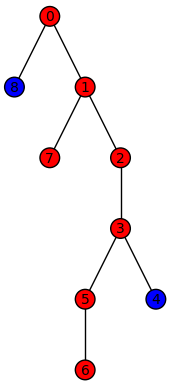

In [3]:
load('models_of_projective_line.py')
X = minimal_rnc_model(f,v5); X
X.show_tree()


## Further Examples

The implementation works in different settings.

### Different Residue Characteristics
The only restriction concerning the residue characteristic is that it must not divide the exponent $n$. 

For example we can compute the lattice of integral differentials for the superelliptic curve defined by 
$$y^n = x^4-2^3 \quad \text{over }\QQ_2,$$
if and only if $2 \nmid n$.

In [8]:
R.<x> = QQ[]
f = x^4-2^3
v2 = QQ.valuation(2)

M3 = integral_differentials(f,3,v2);
print(M3)
M5 = integral_differentials(f,5,v2);
print(M5)
M7 = integral_differentials(f,7,v2);
print(M7)

### Extensions of $\QQ_p$

We can also work over extensions of the $p$-adic numbers. 
In the following we compute the integral differentials for the hyperelliptic curve defined by 
$$y^2-x^6+3^9$$
over $\QQ_3$ and over $\QQ_3(\sqrt{3})$ respectively.

In [5]:
R.<x> = QQ[]
f = x^6-3^9
v3 = QQ.valuation(3)
M = integral_differentials(f,2,v3)
print(M)

L.<sqrt3> = NumberField(x^2-3)
S.<x> = L[]
vL3 = v3.extension(L)
ML = integral_differentials(S(f),2,vL3)
print(ML)

the lattice with basis [3*x, 27]


the lattice with basis [3*sqrt3*x, 27]


## The hyperelliptic discriminant

Assuming that $p \neq 2$, the implementation can also be used to compute the so-called *hyperelliptic discriminant* $\Lambda$.

Let $Y$ be a hyperelliptic curve of genus $g$ over a local field $K$, defined by some equation of the form 
$Y: y^2 = f(x).$ We write $\Delta$ for the discriminant of this equation and $\omega = \frac{dx}{y} \land \dots \land x^{g-1}\frac{dx}{y}$. We call 
$$\Lambda := \Delta^{g} \cdot \omega^{\otimes 8g+4}$$ the *hyperelliptic discriminant*. This is a canonical element of the curve. 
By the order of the hyperelliptic discriminant, $\text{ord}(\Lambda)$, we mean the order of vanishing of  $\Lambda \in (\det M)^{\otimes 8g+4}$ at the prime ideal of $O_K$, where $M$ denotes the lattice of integral differentials.

In the following, we compute the order of the hyperelliptic discriminant of the genus-$2$ curve
$$Y:y^2 =  (x^3-7^7) \cdot (x^3-1) \quad \text{over } \QQ_7.$$


In [7]:
R.<x> = QQ[]
f = (x^3-7^7)*(x^3-1)
v7 = QQ.valuation(7)
a = order_hyperelliptic_discriminant(f,v7)
print(a)
g = 2
a == g * v7(f.discriminant()) - (8*g+4)*v7(covolume(integral_differentials(f,2,v7)))

8


True

The output above means that $7^{-8} \cdot \Lambda$ is a generator for $(\det M )^{\otimes 8g+4}$.

Also, note that in general the $\text{ord}(\Lambda)/g$ is smaller than the valuation of the discriminant of the equation. Moreover $\text{ord}(\Lambda)/g$ is known to be an upper bound for the Artin conductor in the case of semistable reduction [Maugeais03] and in the case $g=2$ [Liu94].


**Literature**

[Kunzweiler20] S. Kunzweiler, Differential forms on hyperelliptic curves with semistable reduction. Research in Number Theory.

[KunzweilerWewers20] S. Kunzweiler and S. Wewers, Integral differential forms for superelliptic curves. ArXiv preprint.

[Liu94] Q.Liu, Conducteur et discriminant minimal de courbes de genre 2. Compositio Mathematica.

[Maugeais03] S. Maugeais, Relevementdes revetements p-cycliques des courbes rationnelles semistables. Mathematische Annalen.
